
# Weather Analysis

-Tempeature is comparitive more on the higher value near Equator

-Humidity is more towards North-hamisphere(40 - 60 latitude)

-Cloudiness has no effect with respect to change of latitude

-Wind speed has no relation with change of latitude



In [12]:
#import the dependencies

from citipy import citipy
import random
import csv
import sys
import math
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import os

var1=datetime.datetime.now()

#all the values of api keys

#all the values of api keys

if os.path.isfile("apikey.csv"):
    key_df=pd.read_csv("apikey.csv")
    akey=key_df.loc[0,'akey']
    gkey=key_df.loc[0,'gkey']
    print("file exist",",akey=",akey)

else:
    akey=input("Enter the Openweather API Key: ")
    gkey=input("Enter the Google API Key: ")
    data = [{'akey': akey,'gkey':gkey}]
    df = pd.DataFrame(data)
    df.to_csv('apikey.csv', index=False)
    print("file do not exist,creating..")

file exist ,akey= 2bf97998be001d3babddbe80bb73edb4


In [13]:
#create empty dataframe to collect all city values and respective weather component

city_df = pd.DataFrame(columns=('Cities', 'Latitude', 'Longitude','Temperature(F)',
                                'Humidity(%)','Cloudiness(%)','Wind Speed(mph)'))

city_df

,Cities,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)


In [14]:
#assign the values to variable that are need for the programs

radius = 70000                       
r=radius/111300            
call_limit=55
call_sleep=50
citylist=[]
item=1
metric="imperial"
api_counter=0
length=500
count=1
break_count=0

#run the loop till we have required number of rows in the dataframe

while item<=length:
    
#generate random value of lat and lng based on the radius of search

    u = float(random.uniform(1.0,80000.0))
    v = float(random.uniform(1.0,80000.0))
    w = r * math.sqrt(u)
    t = 2 * math.pi * v
    x = w * math.cos(t)
    y = w * math.sin(t)
    
#find the city near to the lat n lng

    city=citipy.nearest_city(x, y)
    city_name=city.city_name
    country=city.country_code
    namelist=city_name+","+country

#check if the city is already in the generated list.if not creat the url for API call

    if namelist not in citylist:
        
        citylist.append(namelist)
        text=namelist
        url="https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" %(text,gkey)
        response=req.get(url).json()

# collect the values of lat and lng of the specific cities

        try:
            lat=response["results"][0]["geometry"]["location"]["lat"]
            lon=response["results"][0]["geometry"]["location"]["lng"]

#deplay the api call to avoid the max limit in openweather API call

            if api_counter>call_limit:
                time.sleep(call_sleep)
                print("time delay")
                api_counter=0
            else:
                api_counter+=1
            

#Created url to get the data from weather api using lat and lng     
                
            url_1="http://api.openweathermap.org/data/2.5/weather?lat=%s&lon=%s&units=%s&APPID=%s"%(lat,lon,metric,akey)
            response1=req.get(url_1).json()
            
# Value of Temperature,Humidity,Cloudiness,Wind Speed of the city selected

            try:
                temp=response1["main"]["temp_max"]
                humid=response1["main"]["humidity"]
                cloud=response1["clouds"]["all"]
                wnd_speed=response1["wind"]["speed"]
                print("The valid url # %s for location of %s \n %s" %(count,text,url_1))
                count+=1
                
#Entering the values in dataframe
                city_df = city_df.append([{'Cities':text,
                          'Latitude':lat,
                          'Longitude':lon,
                          'Temperature(F)':temp,
                          'Humidity(%)':humid,
                          'Cloudiness(%)':cloud,
                          'Wind Speed(mph)':wnd_speed}],ignore_index=True)
                item+=1

#check the value of the status of the error for openweather API and break if query limit is reached

            except:
                status1=response1["status"]
                
                if "QUERY_LIMIT" in status:
                    
                    print(status1)
                    break_count+=1
                    break
                    
                else:
                    print("Missing values")
                    continue
                    
#check the value of the status of the error for Google API and break if query limit is reached  

        except:
            
                status=response["status"]
                
                if "QUERY_LIMIT" in status:
                    
                    print(status)
                    break_count+=1
                    break
                
                elif break_count>0:
                    
                    break
                    
                else:
                    print("Missing values")
                    continue
                    
#check if the query limit is reached,break out from the program or else continue to find new city                
    else:
        
        if break_count>0:
            
            break
            
        else:
            
            continue
        
city_df 

The valid url # 1 for location of mataura,pf 
 http://api.openweathermap.org/data/2.5/weather?lat=-23.3470634&lon=-149.4850445&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 2 for location of ushuaia,ar 
 http://api.openweathermap.org/data/2.5/weather?lat=-54.8019121&lon=-68.3029511&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 3 for location of kirakira,sb 
 http://api.openweathermap.org/data/2.5/weather?lat=-10.4487148&lon=161.8964131&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 4 for location of boyuibe,bo 
 http://api.openweathermap.org/data/2.5/weather?lat=-20.4413004&lon=-63.27982249999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 5 for location of tuktoyaktuk,ca 
 http://api.openweathermap.org/data/2.5/weather?lat=69.445358&lon=-133.034181&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 6 for location of sinnamary,gf 
 http://api.openweathermap.org/data/2.5/w

The valid url # 46 for location of jamestown,sh 
 http://api.openweathermap.org/data/2.5/weather?lat=-15.9286343&lon=-5.7151749&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 47 for location of lompoc,us 
 http://api.openweathermap.org/data/2.5/weather?lat=34.6391501&lon=-120.4579409&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 48 for location of khatanga,ru 
 http://api.openweathermap.org/data/2.5/weather?lat=71.964027&lon=102.4406129&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 49 for location of mongoumba,cf 
 http://api.openweathermap.org/data/2.5/weather?lat=3.6378484&lon=18.5908437&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 50 for location of punta arenas,cl 
 http://api.openweathermap.org/data/2.5/weather?lat=-53.1638329&lon=-70.9170683&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 51 for location of bambous virieux,mu 
 http://api.openweathermap.org/data/2

The valid url # 91 for location of nizhneyansk,ru 
 http://api.openweathermap.org/data/2.5/weather?lat=71.450058&lon=136.1122279&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 92 for location of tubruq,ly 
 http://api.openweathermap.org/data/2.5/weather?lat=32.0681759&lon=23.941751&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 93 for location of champerico,gt 
 http://api.openweathermap.org/data/2.5/weather?lat=14.2974022&lon=-91.9087026&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 94 for location of kuito,ao 
 http://api.openweathermap.org/data/2.5/weather?lat=-12.3940412&lon=16.9417632&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 95 for location of mooi river,za 
 http://api.openweathermap.org/data/2.5/weather?lat=-29.2106317&lon=30.0029572&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 96 for location of hilo,us 
 http://api.openweathermap.org/data/2.5/weather?lat=

The valid url # 136 for location of korla,cn 
 http://api.openweathermap.org/data/2.5/weather?lat=41.725891&lon=86.17463300000001&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 137 for location of codrington,ag 
 http://api.openweathermap.org/data/2.5/weather?lat=17.6425736&lon=-61.8204456&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 138 for location of bilma,ne 
 http://api.openweathermap.org/data/2.5/weather?lat=18.6929789&lon=12.9176518&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 139 for location of satitoa,ws 
 http://api.openweathermap.org/data/2.5/weather?lat=-14.0287893&lon=-171.4327056&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 140 for location of puerto cabezas,ni 
 http://api.openweathermap.org/data/2.5/weather?lat=14.0391161&lon=-83.39496319999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 141 for location of wamba,cd 
 http://api.openweathermap.org

The valid url # 181 for location of kochubey,ru 
 http://api.openweathermap.org/data/2.5/weather?lat=44.3912121&lon=46.5565748&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 182 for location of necochea,ar 
 http://api.openweathermap.org/data/2.5/weather?lat=-38.5544968&lon=-58.73960879999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 183 for location of santa rosalia,mx 
 http://api.openweathermap.org/data/2.5/weather?lat=27.3361939&lon=-112.2701486&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 184 for location of bajah,tn 
 http://api.openweathermap.org/data/2.5/weather?lat=36.7333193&lon=9.1843676&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 185 for location of marsh harbour,bs 
 http://api.openweathermap.org/data/2.5/weather?lat=26.5241653&lon=-77.09098089999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 186 for location of cabo san lucas,mx 
 http://api.ope

The valid url # 226 for location of college,us 
 http://api.openweathermap.org/data/2.5/weather?lat=41.5077578&lon=-71.3300034&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 227 for location of esperance,au 
 http://api.openweathermap.org/data/2.5/weather?lat=-33.8608027&lon=121.8896205&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
time delay
The valid url # 228 for location of pangnirtung,ca 
 http://api.openweathermap.org/data/2.5/weather?lat=66.1465578&lon=-65.7012182&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 229 for location of mar del plata,ar 
 http://api.openweathermap.org/data/2.5/weather?lat=-38.0054771&lon=-57.5426106&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 230 for location of georgetown,sh 
 http://api.openweathermap.org/data/2.5/weather?lat=-7.926222999999999&lon=-14.4112011&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 231 for location of chuy,uy 
 http://api.op

The valid url # 271 for location of domoni,km 
 http://api.openweathermap.org/data/2.5/weather?lat=-12.2632051&lon=44.5290018&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 272 for location of mattru,sl 
 http://api.openweathermap.org/data/2.5/weather?lat=7.6042266&lon=-12.1718486&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 273 for location of chicama,pe 
 http://api.openweathermap.org/data/2.5/weather?lat=-7.847994799999999&lon=-79.1407421&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 274 for location of honiara,sb 
 http://api.openweathermap.org/data/2.5/weather?lat=-9.4456381&lon=159.9728999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 275 for location of botwood,ca 
 http://api.openweathermap.org/data/2.5/weather?lat=49.1422983&lon=-55.3440853&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 276 for location of metro,id 
 http://api.openweathermap.org/data/2.5/weat

The valid url # 316 for location of humaita,br 
 http://api.openweathermap.org/data/2.5/weather?lat=-7.5169578&lon=-63.0298013&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 317 for location of nuevo progreso,mx 
 http://api.openweathermap.org/data/2.5/weather?lat=26.0498321&lon=-97.9511137&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 318 for location of raudeberg,no 
 http://api.openweathermap.org/data/2.5/weather?lat=61.9829132&lon=5.1351057&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 319 for location of manado,id 
 http://api.openweathermap.org/data/2.5/weather?lat=1.4748305&lon=124.8420794&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 320 for location of rantepao,id 
 http://api.openweathermap.org/data/2.5/weather?lat=-2.9703732&lon=119.8757349&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 321 for location of korsakov,ru 
 http://api.openweathermap.org/data/2.5/

The valid url # 361 for location of black river,jm 
 http://api.openweathermap.org/data/2.5/weather?lat=18.0335359&lon=-77.85673799999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 362 for location of hami,cn 
 http://api.openweathermap.org/data/2.5/weather?lat=42.81842&lon=93.51514999999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 363 for location of mayo,ca 
 http://api.openweathermap.org/data/2.5/weather?lat=63.59426199999999&lon=-135.8964919&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 364 for location of toba,jp 
 http://api.openweathermap.org/data/2.5/weather?lat=34.481435&lon=136.8433615&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 365 for location of mount isa,au 
 http://api.openweathermap.org/data/2.5/weather?lat=-20.7255748&lon=139.4927085&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 366 for location of mogadishu,so 
 http://api.openweathermap.or

The valid url # 406 for location of prieska,za 
 http://api.openweathermap.org/data/2.5/weather?lat=-29.7069446&lon=22.739048&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 407 for location of ormara,pk 
 http://api.openweathermap.org/data/2.5/weather?lat=25.2665929&lon=64.6095785&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 408 for location of sao joao da barra,br 
 http://api.openweathermap.org/data/2.5/weather?lat=-21.6368446&lon=-41.0484428&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 409 for location of igrim,ru 
 http://api.openweathermap.org/data/2.5/weather?lat=63.19083319999999&lon=64.4183685&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 410 for location of bentiu,sd 
 http://api.openweathermap.org/data/2.5/weather?lat=9.231487&lon=29.8005027&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 411 for location of bambanglipuro,id 
 http://api.openweathermap.org/da

The valid url # 451 for location of mahajanga,mg 
 http://api.openweathermap.org/data/2.5/weather?lat=-15.6921494&lon=46.3336857&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 452 for location of luba,gq 
 http://api.openweathermap.org/data/2.5/weather?lat=3.4590145&lon=8.552874599999999&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 453 for location of libertador general san martin,ar 
 http://api.openweathermap.org/data/2.5/weather?lat=-23.8153322&lon=-64.7928261&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 454 for location of sandnessjoen,no 
 http://api.openweathermap.org/data/2.5/weather?lat=66.0215534&lon=12.6314628&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 455 for location of palaia fokaia,gr 
 http://api.openweathermap.org/data/2.5/weather?lat=37.7178168&lon=23.9464496&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
time delay
The valid url # 456 for location of plastun,ru 


The valid url # 496 for location of malinovoye ozero,ru 
 http://api.openweathermap.org/data/2.5/weather?lat=51.6781161&lon=79.7893754&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 497 for location of mandalgovi,mn 
 http://api.openweathermap.org/data/2.5/weather?lat=45.7631589&lon=106.2650297&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 498 for location of bahia honda,cu 
 http://api.openweathermap.org/data/2.5/weather?lat=22.9081486&lon=-83.1702597&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 499 for location of salalah,om 
 http://api.openweathermap.org/data/2.5/weather?lat=17.0506675&lon=54.1065864&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4
The valid url # 500 for location of puerto escondido,mx 
 http://api.openweathermap.org/data/2.5/weather?lat=15.8719795&lon=-97.0767365&units=imperial&APPID=2bf97998be001d3babddbe80bb73edb4


,Cities,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,"mataura,pf",-23.347063,-149.485044,71.75,100,0,7.96
1,"ushuaia,ar",-54.801912,-68.302951,33.80,86,90,5.82
2,"kirakira,sb",-10.448715,161.896413,82.19,100,56,19.37
3,"boyuibe,bo",-20.441300,-63.279822,82.10,40,88,20.83
4,"tuktoyaktuk,ca",69.445358,-133.034181,59.00,58,75,11.41
5,"sinnamary,gf",5.374671,-52.954599,81.20,94,0,10.76
6,"manaure,co",11.772778,-72.444227,82.73,100,44,11.99
7,"kattivakkam,in",12.968213,80.259943,82.40,88,75,3.36
8,"vestmanna,fo",62.163170,-7.165286,44.60,93,92,29.97
9,"hithadhoo,mv",-0.606057,73.089225,81.02,100,56,13.22


In [15]:
city_df[['City','Country']] = city_df['Cities'].str.split(',', expand=True)

In [16]:
#printing the dataframe
city_df = city_df.drop('Cities', 1)

city_df["City"]=city_df["City"].str.capitalize()

city_df["Country"]=city_df["Country"].str.upper()

city_df = city_df[['City', 'Country', 'Latitude','Longitude','Temperature(F)','Humidity(%)','Cloudiness(%)','Wind Speed(mph)']]

city_df

,City,Country,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Mataura,PF,-23.347063,-149.485044,71.75,100,0,7.96
1,Ushuaia,AR,-54.801912,-68.302951,33.80,86,90,5.82
2,Kirakira,SB,-10.448715,161.896413,82.19,100,56,19.37
3,Boyuibe,BO,-20.441300,-63.279822,82.10,40,88,20.83
4,Tuktoyaktuk,CA,69.445358,-133.034181,59.00,58,75,11.41
5,Sinnamary,GF,5.374671,-52.954599,81.20,94,0,10.76
6,Manaure,CO,11.772778,-72.444227,82.73,100,44,11.99
7,Kattivakkam,IN,12.968213,80.259943,82.40,88,75,3.36
8,Vestmanna,FO,62.163170,-7.165286,44.60,93,92,29.97
9,Hithadhoo,MV,-0.606057,73.089225,81.02,100,56,13.22


In [17]:
#write the output in csv

city_df.to_csv("output_city.csv",index=False)

#geth the x-axis

x=city_df["Latitude"]
yt=city_df["Temperature(F)"]
yh=city_df["Humidity(%)"]
yc=city_df["Cloudiness(%)"]
ys=city_df["Wind Speed(mph)"]

## Build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

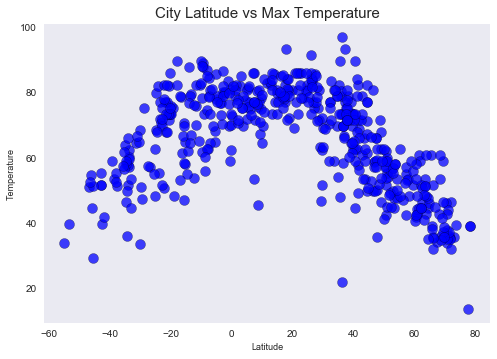

In [18]:
#Temperature (F) vs. Latitude scatter plot

plt.scatter(x,yt,marker="o",facecolors="blue", edgecolors="black",s=100, alpha=0.75)

plt.title('City Latitude vs Max Temperature', fontsize=15)
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Temperature', fontsize=9)
plt.grid()
plt.savefig('tempvsLat.png')
plt.show()

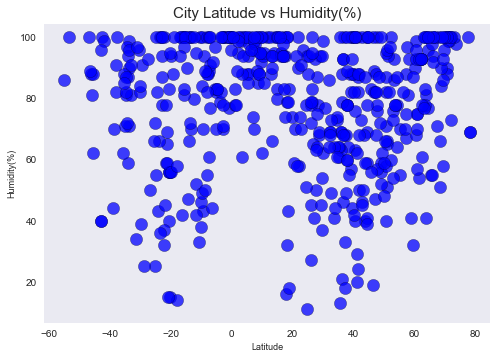

In [19]:
#Humidity(%) vs. Latitude scatter plot

plt.scatter(x,yh,marker="o",facecolors="blue", edgecolors="black",s=150, alpha=0.75)

plt.title('City Latitude vs Humidity(%)', fontsize=15)
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Humidity(%)', fontsize=9)
plt.grid()
plt.savefig('HumidvsLat.png')
plt.show()

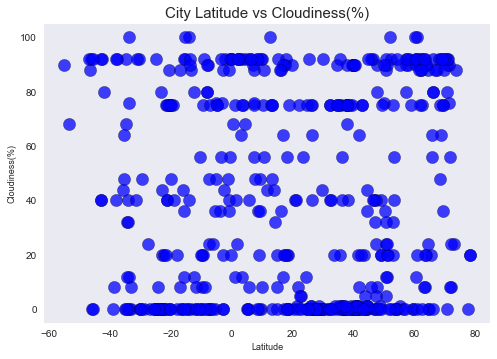

In [20]:
#Cloudiness(%) vs. Latitude scatter plot

plt.scatter(x,yc,marker="o",facecolors="blue", edgecolors="black",s=150, alpha=0.75)

plt.title('City Latitude vs Cloudiness(%)', fontsize=15)
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Cloudiness(%)', fontsize=9)
plt.grid()
plt.savefig('CloudvsLat.png')
plt.show()

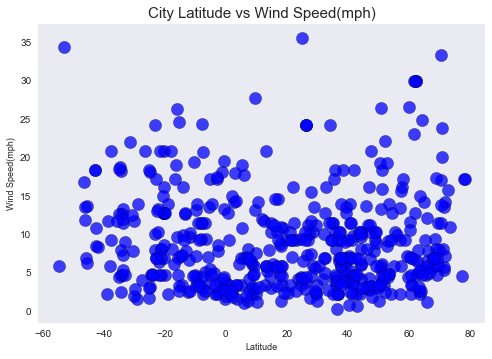

Total Duration to run this Program : 0:14:53.756118 


In [21]:
#Wind Speed(mph) vs. Latitude scatter plot


plt.scatter(x,ys,marker="o",facecolors="blue", edgecolors="black",s=150,alpha=0.75)
plt.title('City Latitude vs Wind Speed(mph)', fontsize=15)
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Wind Speed(mph)', fontsize=9)
plt.grid()
plt.savefig('WindvsLat.png')
plt.show()

var2=datetime.datetime.now()

result=var2-var1
print("Total Duration to run this Program : %s " %(result))